http://kaggle.com/datasets/henrysue/online-shoppers-intention

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/Pratice ML/Supervised Learning/Classification/Logistic Regression /Datasets/archive (3).zip" -d "/content/drive/MyDrive/Pratice ML/Supervised Learning/Classification/Logistic Regression /Datasets/"

Archive:  /content/drive/MyDrive/Pratice ML/Supervised Learning/Classification/Logistic Regression /Datasets/archive (3).zip
  inflating: /content/drive/MyDrive/Pratice ML/Supervised Learning/Classification/Logistic Regression /Datasets/online_shoppers_intention.csv  


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Pratice ML/Supervised Learning/Classification/Logistic Regression /Datasets/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


###**Khám phá dữ liệu**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
# kiểm tra giá trị từng lớp
data = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']]

for i in data:
  print(df[i].value_counts())
  print()


Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: count, dtype: int64

Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
65.600000        1
552.200000       1
206.250000       1
401.150000       1
315.966667       1
Name: count, Length: 3335, dtype: int64

Informational
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: count, dtype: int64

Informational_Duration
0.000000       9925
9.000000         33
10.000000        26
7.000000         26
6.000000         26
               ... 
1009.733333     

###**Trực quan hoá**

- 0 Quản trị
- 1 Thời lượng Quản trị
- 2 Thông tin
- 3 Thời lượng Thông tin
- 4 Liên quan đến Sản phẩm
- 5 Thời lượng Liên quan đến Sản phẩm
- 6 Tỷ lệ Thoát
- 7 Tỷ lệ Thoát
- 8 Giá trị Trang
- 9 Ngày Đặc biệt
- 10 Tháng
- 11 Hệ điều hành
- 12 Trình duyệt
- 13 Khu vực
- 14 Loại Lưu lượng
- 15 Loại Khách truy cập
- 16 Cuối tuần
- 17 Doanh thu

#### - kiểm tra tương quan

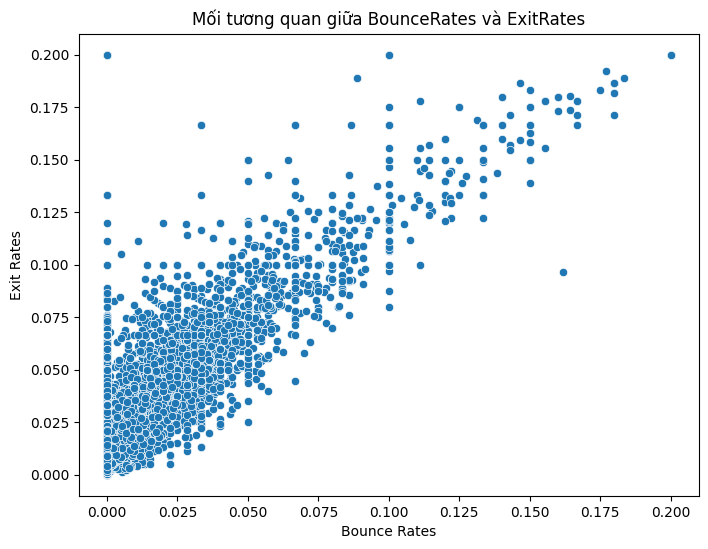

In [ ]:
#Tương quan giữa Tỷ lệ Thoát trang đầu và Tỷ lệ Thoát
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BounceRates', y='ExitRates', data=df)
plt.title('Mối tương quan giữa BounceRates và ExitRates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.show()

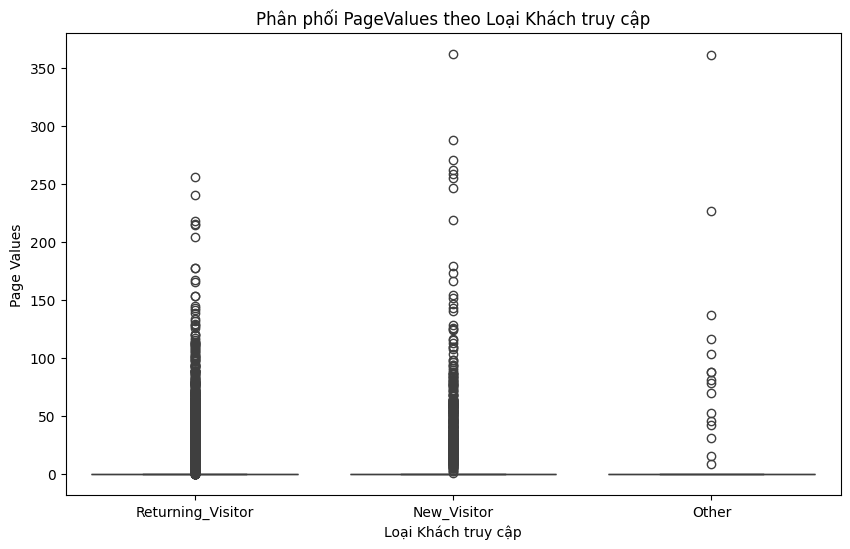

In [ ]:
#So sánh PageValues theo Loại Khách truy cập
plt.figure(figsize=(10, 6))
# 'hue' có thể dùng để thêm chiều phân loại thứ hai, nhưng ở đây chỉ dùng 'x' và 'y'
sns.boxplot(x='VisitorType', y='PageValues', data=df)
plt.title('Phân phối PageValues theo Loại Khách truy cập')
plt.xlabel('Loại Khách truy cập')
plt.ylabel('Page Values')
plt.show()

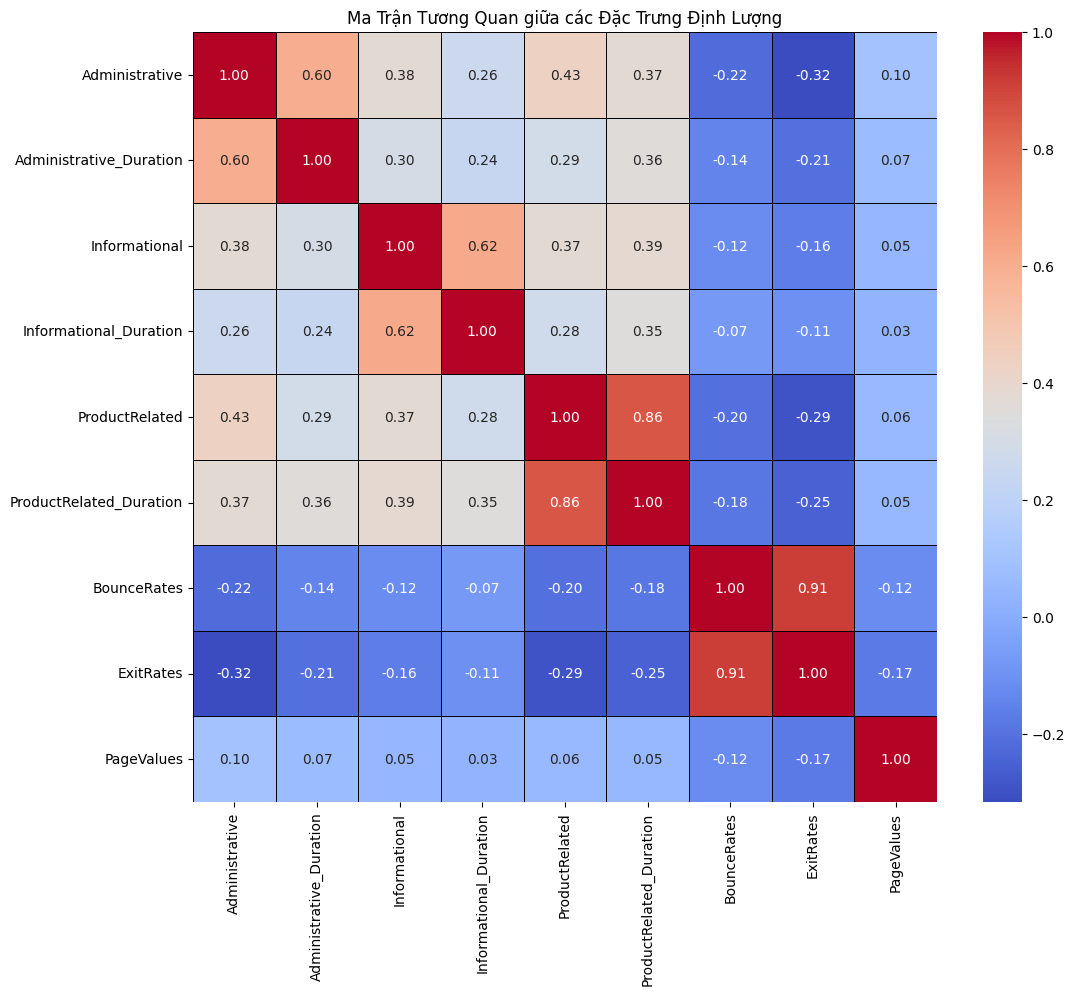

In [ ]:
### Biểu đồ Ma trận Tương quan (Heatmap)
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues']

# 2. Tính toán ma trận tương quan
corr_matrix = df[numerical_cols].corr()

# 3. Vẽ Heatmap
plt.figure(figsize=(12, 10))
# annot=True: hiển thị giá trị tương quan trên biểu đồ
# cmap='coolwarm': sử dụng bảng màu phổ biến cho tương quan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, linewidths=.5, linecolor='black')
plt.title('Ma Trận Tương Quan giữa các Đặc Trưng Định Lượng')
plt.show()


#### - Kiểm tra outlier

In [ ]:
df['SpecialDay'].value_counts()

,count
SpecialDay,
0.0,11079
0.6,351
0.8,325
0.4,243
0.2,178
1.0,154


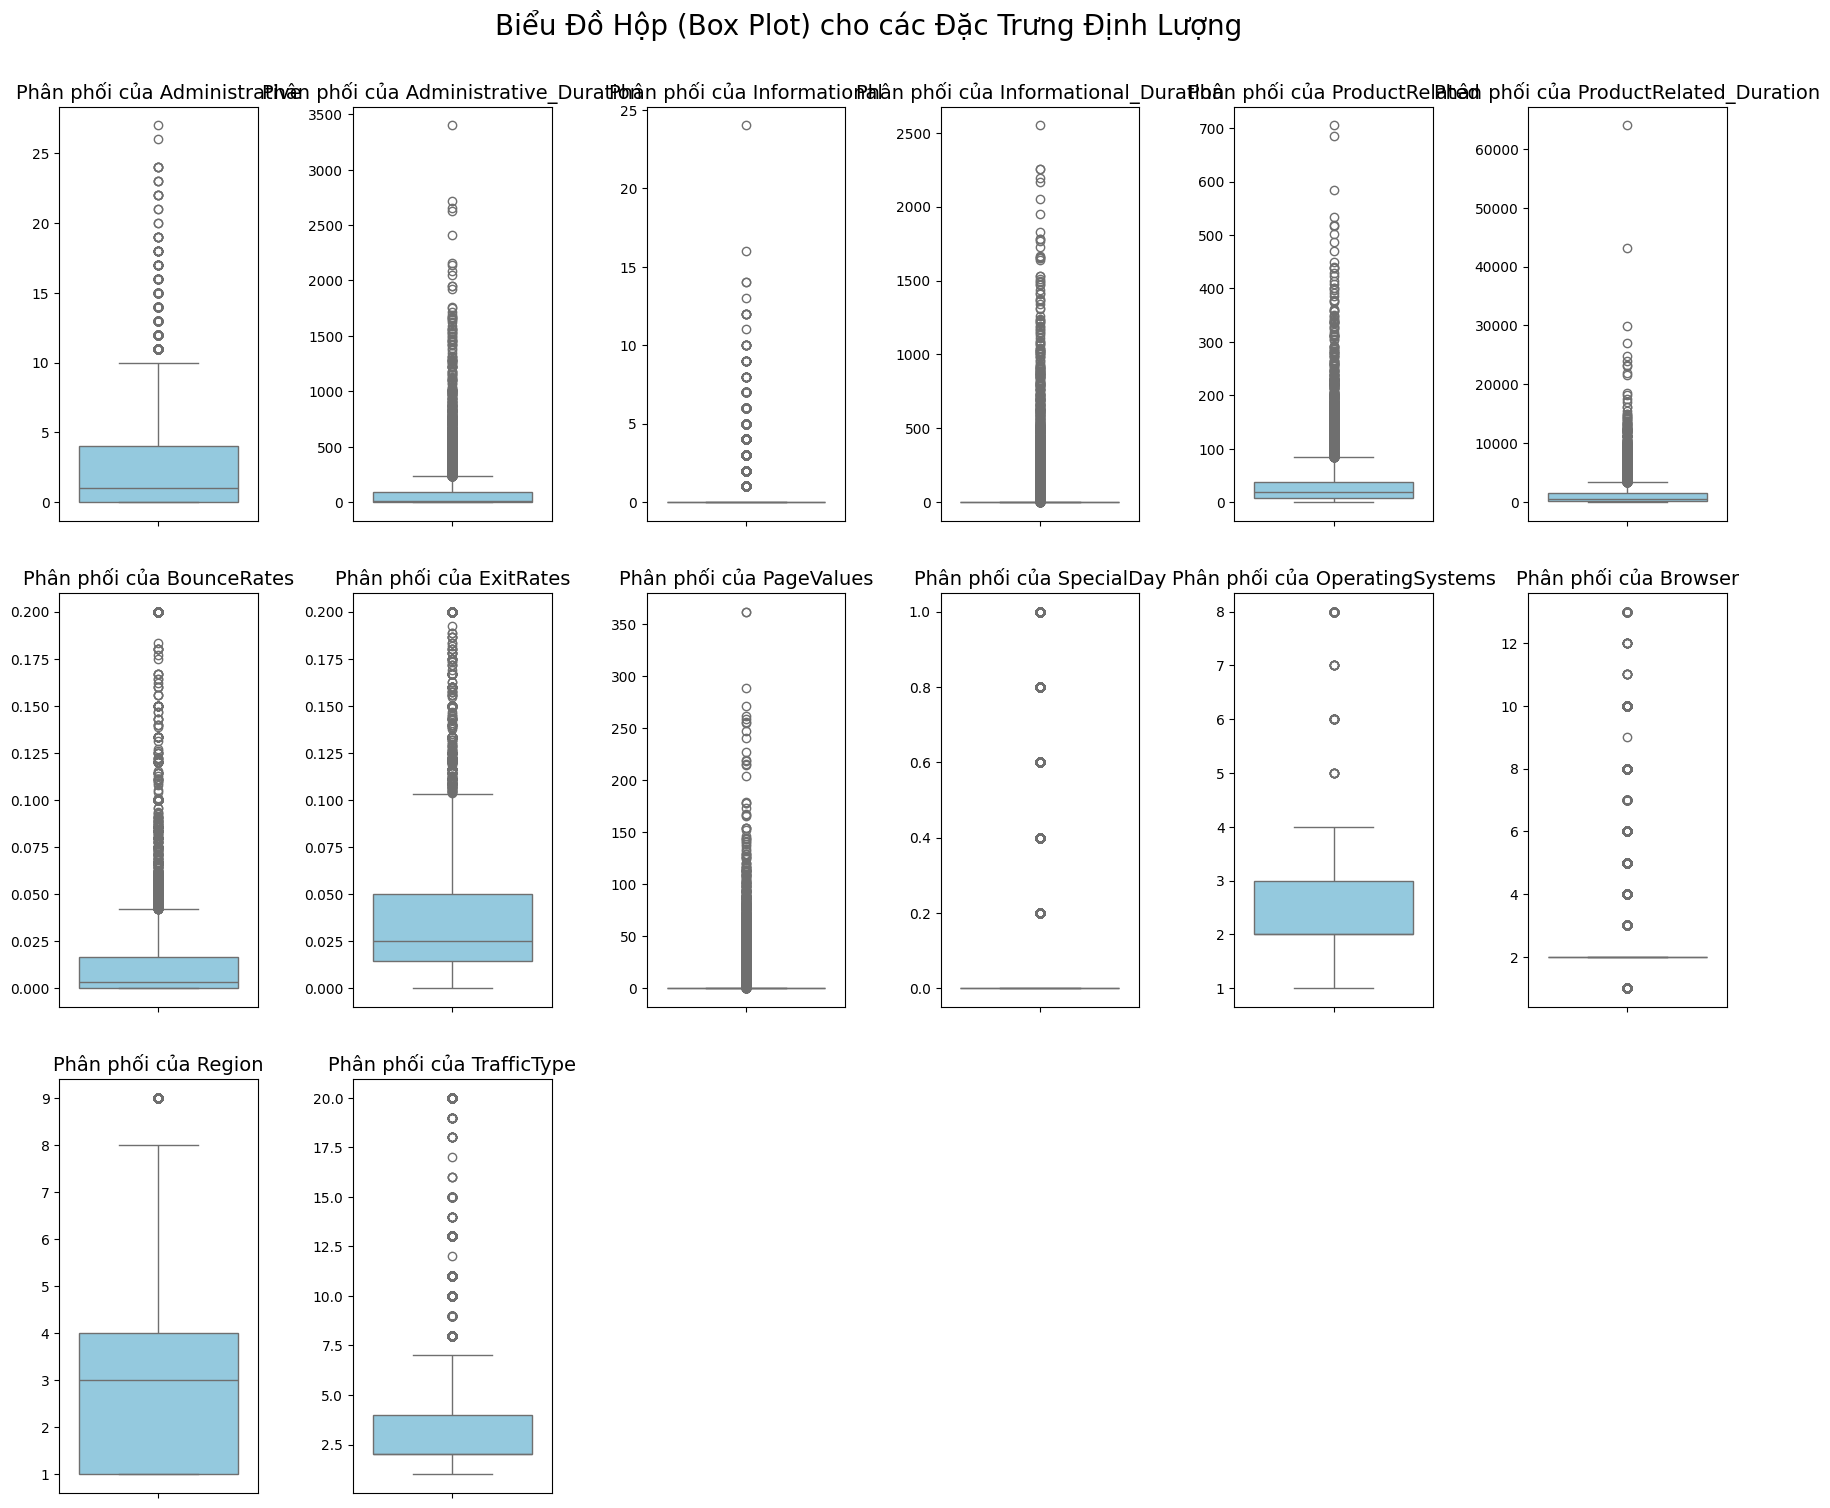

In [ ]:
outlier_cols = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
# 2. Chuẩn bị subplots
num_cols_to_plot = len(outlier_cols.columns)
# Tính toán số hàng và cột tối ưu (ví dụ: 3 hàng, 3 cột)
n_rows = 3
n_cols = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15)) # Tạo một figure chứa nhiều axes (khung)

# Làm phẳng mảng axes để dễ dàng lặp qua
axes = axes.flatten()

# 3. Lặp qua các cột và vẽ Box Plot
for i, col in enumerate(outlier_cols.columns): # Iterate over column names
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue') # Vẽ boxplot trên từng khung (ax)
    axes[i].set_title(f'Phân phối của {col}', fontsize=14)
    axes[i].set_ylabel('') # Loại bỏ nhãn y để tránh lộn xộn

# 4. Xử lý các khung trống (nếu có)
for j in range(num_cols_to_plot, n_rows * n_cols):
    fig.delaxes(axes[j])

# 5. Điều chỉnh layout và hiển thị
plt.tight_layout(pad=3.0) # Điều chỉnh khoảng cách giữa các biểu đồ
plt.suptitle('Biểu Đồ Hộp (Box Plot) cho các Đặc Trưng Định Lượng', fontsize=20, y=1.02)
plt.show()

###**Tiền xử lý**

In [ ]:
#  10  Month                     object
#  15  VisitorType               object
#  16  Weekend                   bool
#  17  Revenue                   bool


In [ ]:
# kiểm tra missing value
missing_values = df.isna().sum()
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
data_label = df[["Month","VisitorType","Weekend","Revenue"]]
for i in data_label:

  print(data_label[i].unique())
  print()

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

['Returning_Visitor' 'New_Visitor' 'Other']

[False  True]

[False  True]



In [ ]:
# mã hóa featrue and label
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Month'] = label.fit_transform(df['Month'])
df['VisitorType'] = label.fit_transform(df['VisitorType'])
df['Weekend'] = label.fit_transform(df['Weekend'])
df['Revenue'] = label.fit_transform(df['Revenue'])

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
# reshape nếu cần

In [ ]:
# kiếm tra và xử lí outlier bằng nomarlization or standard
#  0   Administrative            int64
#  1   Administrative_Duration   float64
#  2   Informational             int64
#  3   Informational_Duration    float64
#  4   ProductRelated            int64
#  5   ProductRelated_Duration   float64
#  6   BounceRates               float64
#  7   ExitRates                 float64
#  8   PageValues                float64
#  9   SpecialDay                float64
# 11  OperatingSystems             int64
# 12  Browser                      int64
# 13  Region                       int64
# 14  TrafficType                  int64
X_scale = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_scale)

In [ ]:
# chia dữ liệu
# Revenue: 1 = mua, 0 = không

X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']
print(X.shape)
print(y.shape)

(12330, 17)
(12330,)


### **Chia dữ liệu**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(8631, 17)
(8631,)
(1850, 17)
(1850,)
(1849, 17)
(1849,)


### **Train**

In [ ]:
model = LogisticRegression()
history = model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#lưu model


In [ ]:
y_pred = model.predict(X_val)
y_pred_pro = model.predict_proba(X_val) #xác xuất trên từng lớp


### **Đánh giá**

In [ ]:
# accuracy
acc = accuracy_score(y_val, y_pred)
print("Độ chính xác của mô hình:", acc*100)

Độ chính xác của mô hình: 88.15575987020011


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1569
           1       0.73      0.34      0.47       280

    accuracy                           0.88      1849
   macro avg       0.81      0.66      0.70      1849
weighted avg       0.87      0.88      0.86      1849



In [ ]:
# Đánh giá khả năng phân biệt giữa hai lớp
from sklearn.metrics import roc_curve, roc_auc_score
# Tính ROC và AUC với xác xuất từng lớp
fpr, tpr, thresholds = roc_curve(y_val, y_pred_pro[:, 1]) #reshape [:, 1]
auc_score = roc_auc_score(y_val, y_pred_pro[:, 1])

In [ ]:
print("RUC và AUC ", auc_score)

RUC và AUC  0.8417645452062278


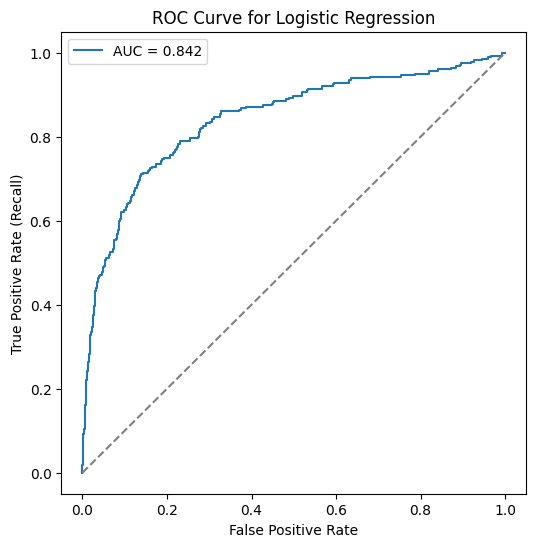

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

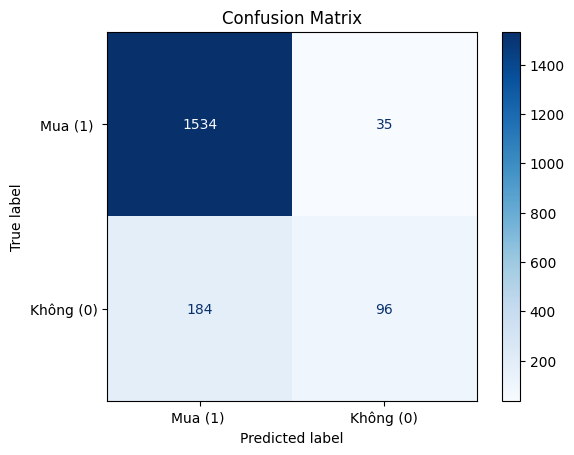

In [ ]:
# ma trận nhầm lẫn confussion matrix
cfm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=['Mua (1) ', 'Không (0)'])
disp.plot(cmap=plt.cm.Blues) # You can choose different colormaps
plt.title("Confusion Matrix")
plt.show()